In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

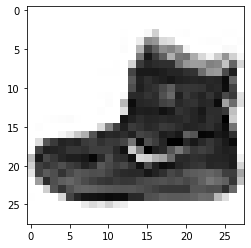

In [8]:
plt.imshow(X_train[0],cmap='Greys')

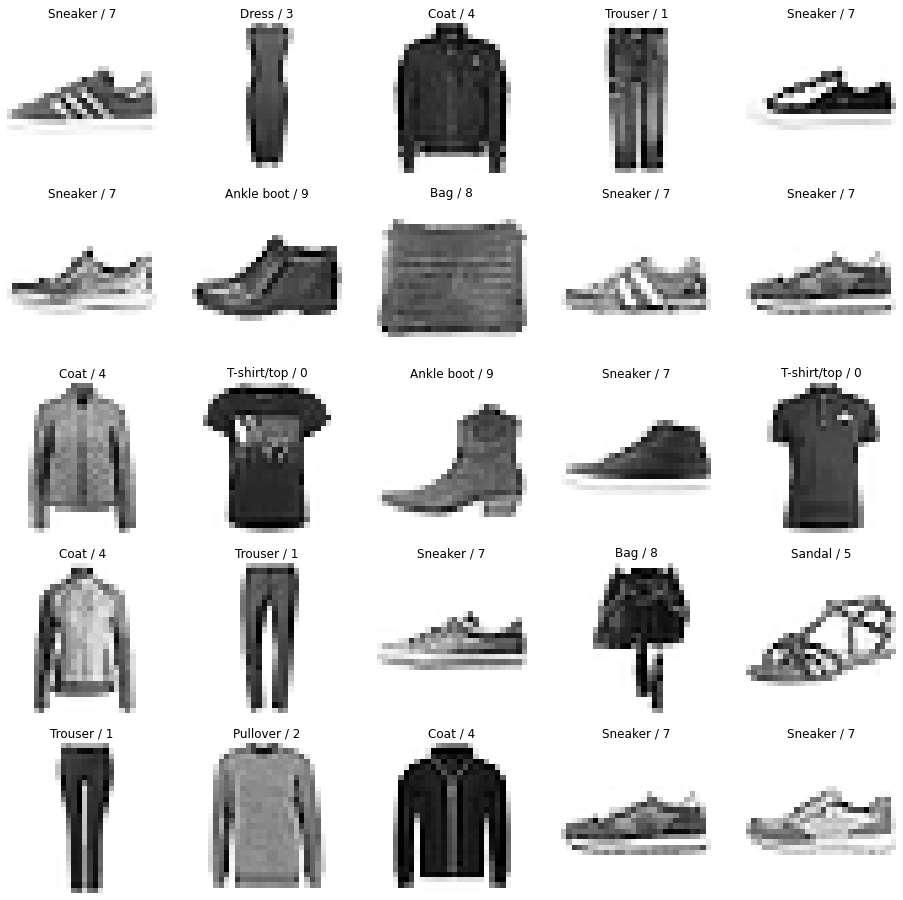

In [9]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train,-1)
X_train.ndim

4

In [12]:
X_test=np.expand_dims(X_test,-1)

In [13]:
X_train = X_train/255
X_test= X_test/255

In [14]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [15]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [16]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 6s 60ms/step - loss: 0.6541 - accuracy: 0.7853 - val_loss: 0.4332 - val_accuracy: 0.8483
Epoch 2/10
94/94 [==============================] - 5s 57ms/step - loss: 0.3819 - accuracy: 0.8664 - val_loss: 0.3644 - val_accuracy: 0.8742
Epoch 3/10
94/94 [==============================] - 5s 55ms/step - loss: 0.3278 - accuracy: 0.8856 - val_loss: 0.3492 - val_accuracy: 0.8740
Epoch 4/10
94/94 [==============================] - 5s 55ms/step - loss: 0.2977 - accuracy: 0.8954 - val_loss: 0.3109 - val_accuracy: 0.8905
Epoch 5/10
94/94 [==============================] - 5s 54ms/step - loss: 0.2767 - accuracy: 0.9016 - val_loss: 0.2946 - val_accuracy: 0.8983
Epoch 6/10
94/94 [==============================] - 5s 54ms/step - loss: 0.2610 - accuracy: 0.9077 - val_loss: 0.2922 - val_accuracy: 0.8976
Epoch 7/10
94/94 [==============================] - 5s 55ms/step - loss: 0.2462 - accuracy: 0.9124 - val_loss: 0.2742 - val_accuracy: 0.9070
Epoch 8/10
94

In [20]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.11, 0.05, 0.  ]], dtype=float32)

In [21]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2744 - accuracy: 0.9026


[0.2744401693344116, 0.9025999903678894]

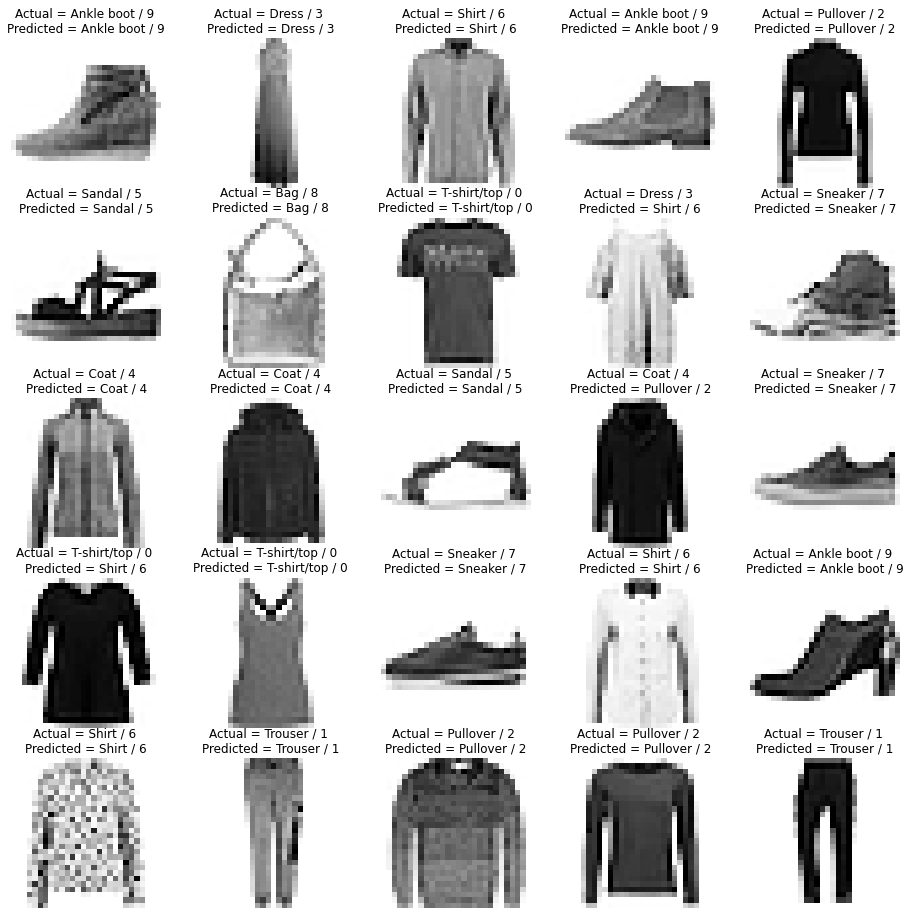

In [23]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

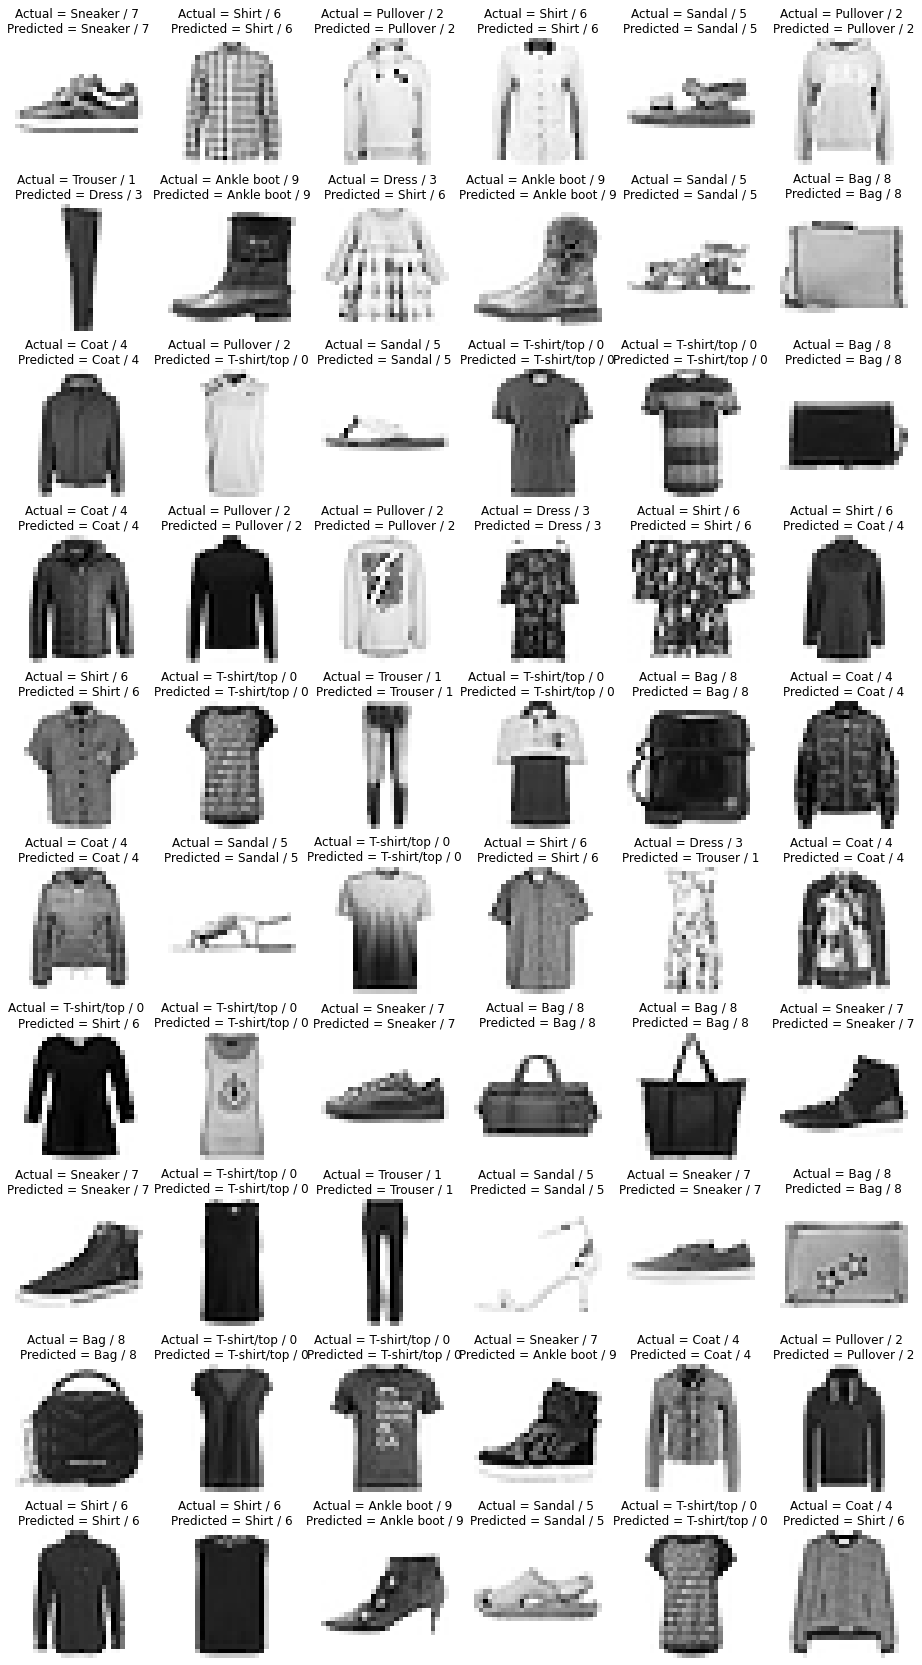

In [24]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [25]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



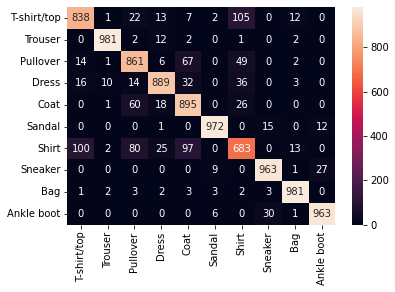

In [26]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [27]:
model.save('fashion_mnist_cnn_model.h5')

In [28]:
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 7s 75ms/step - loss: 1.0163 - accuracy: 0.6231 - val_loss: 0.5672 - val_accuracy: 0.7763
Epoch 2/20
94/94 [==============================] - 7s 74ms/step - loss: 0.5404 - accuracy: 0.7961 - val_loss: 0.4628 - val_accuracy: 0.8251
Epoch 3/20
94/94 [==============================] - 7s 75ms/step - loss: 0.4493 - accuracy: 0.8348 - val_loss: 0.3994 - val_accuracy: 0.8528
Epoch 4/20
94/94 [==============================] - 7s 75ms/step - loss: 0.3973 - accuracy: 0.8559 - val_loss: 0.3614 - val_accuracy: 0.8667
Epoch 5/20
94/94 [==============================] - 7s 75ms/step - loss: 0.3619 - accuracy: 0.8695 - val_loss: 0.3488 - val_accuracy: 0.8660
Epoch 6/20
94/94 [==============================] - 7s 79ms/step - loss: 0.3364 - accuracy: 0.8775 - val_loss: 0.3235 - val_accuracy: 0.8808
Epoch 7/20
94/94 [==============================] - 7s 75ms/step - loss: 0.3171 - accuracy: 0.8832 - val_loss: 0.3258 - val_accuracy: 0.8812
Epoch 8/20
94

94/94 [==============================] - 13s 142ms/step - loss: 0.0771 - accuracy: 0.9729 - val_loss: 0.3945 - val_accuracy: 0.9091
Epoch 39/50
94/94 [==============================] - 14s 145ms/step - loss: 0.0746 - accuracy: 0.9741 - val_loss: 0.3949 - val_accuracy: 0.9109
Epoch 40/50
94/94 [==============================] - 14s 145ms/step - loss: 0.0721 - accuracy: 0.9745 - val_loss: 0.4168 - val_accuracy: 0.9052
Epoch 41/50
94/94 [==============================] - 14s 144ms/step - loss: 0.0697 - accuracy: 0.9758 - val_loss: 0.4155 - val_accuracy: 0.8982
Epoch 42/50
94/94 [==============================] - 14s 151ms/step - loss: 0.0737 - accuracy: 0.9739 - val_loss: 0.4012 - val_accuracy: 0.9061
Epoch 43/50
94/94 [==============================] - 14s 145ms/step - loss: 0.0703 - accuracy: 0.9759 - val_loss: 0.4241 - val_accuracy: 0.9039
Epoch 44/50
94/94 [==============================] - 13s 141ms/step - loss: 0.0659 - accuracy: 0.9765 - val_loss: 0.4245 - val_accuracy: 0.9071
Epoc

[0.4358161687850952, 0.9036999940872192]